### Initial Dataset Analysis
Import libraries and dataset  <br>
Inspect the head of the data and key statistics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('~/Desktop/house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Distirbuted Data due to the following : **

- maximum square feet of 13,540 and a minimum of 290.
- largest number of bedrooms is 33; very large house included in our data set along with the existence of a house with no bedrooms.

**Most attractive bedroom-wise house**

Find the most common house for a house buyer. First thing most people take into account are the number of bedrooms that a house consists of.

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

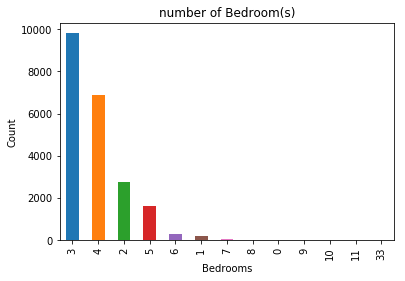

In [4]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom(s)')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

The above bar chart shows that 3 bedroom houses are sold most commonly, with the 4 bedroom houses coming up next. 
It could be useful for a starting point of a house builder and/or seller towards attracting a higher number of buyers.

** Locality of houses **

Now that the highest selling bedroom-wise houses are known, next thing to look at is the location of houses based on the given latitude and longitude data.

<Figure size 720x720 with 0 Axes>

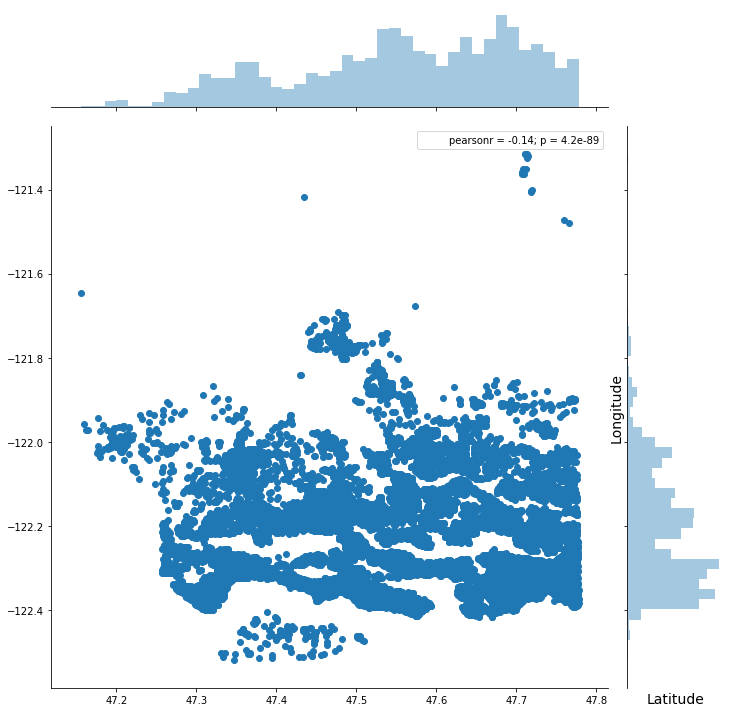

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [5]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=14)
plt.xlabel('Latitude', fontsize=14)
plt.show()
sns.despine

The above visualization depicts the concentration and placement of data, from which we can infer that there is a higher concentration of houses within the interception of ranges -47.7 and -47.8 for latitude and -122.2 to -122.4 for longitude, making this area the ideal location to build and sell a house.

### Test Variable analysis prior to feature engineering and cleaning of the data

In [6]:
data['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Skewness: 4.024069
Kurtosis: 34.585540


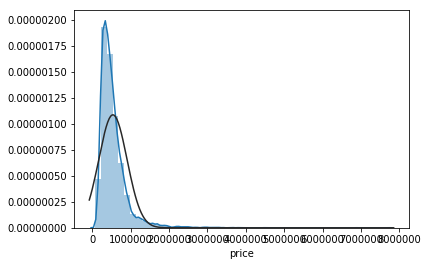

In [7]:
# Histogram of price
sns.distplot(data['price'] , fit=norm);

print("Skewness: %f" % data['price'].skew())
print("Kurtosis: %f" % data['price'].kurt())

### Multivariable analysis is carried out towards some underlying relations


In [8]:
categorical = len(data.select_dtypes(include=['object']).columns)
numerical = len(data.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', categorical+numerical, 'features')

Total Features:  21 features


Convert the data found within the 'date' column to 1’s and 0’s so our data are less influenced.

In [9]:
converted_dates = [1 if int(str(value)[:4]) == 2014 else 0 for value in data.date]
data['date'] = converted_dates

In order to discover the underlying relations between these features and house prices,<br> a **correlation matrix** is constructed below using the traning set.

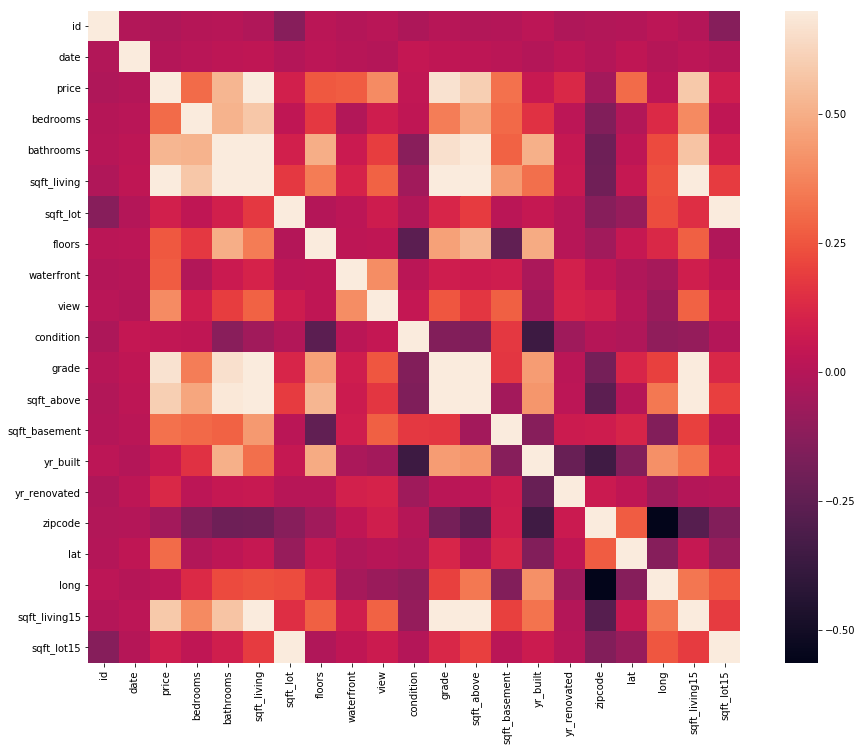

In [10]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(matrix, vmax=0.7, square=True)

**The top 5 correlated variables to price** are calculated below and examined for containing any outliers, in which case they will be removed; pre-cleaning on each of these top features is carried out.

In [11]:
topcols = matrix.nlargest(5, 'price')['price'].index
top = pd.DataFrame(topcols)
top.columns = ['Most Correlated Features']
top

,Most Correlated Features
0,price
1,sqft_living
2,grade
3,sqft_above
4,sqft_living15


The square feet living variable is the most ***predicting variable***, which is a continuous variable, expressing that the larger square footage of the house is, the higher its price will be. Next variables to follow are the grade, the square footage of house apart from basement and the living room area in 2015 which implies some renovations.


A joint plot is constructed of the price against each of the above variables to visually **detect and remove any outliers** <br>towards a higher ** Pearson correlation coefficient value **.

                price  sqft_living
price        1.000000     0.702035
sqft_living  0.702035     1.000000


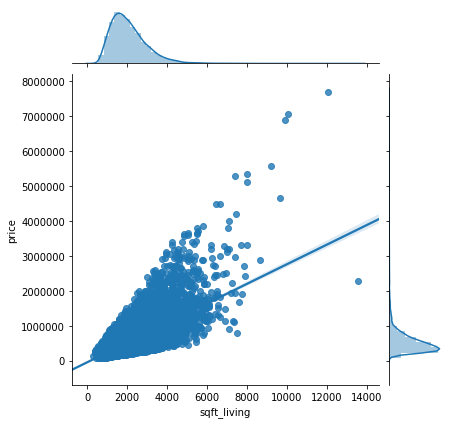

In [12]:
# Living Area vs Sale Price
g = sns.jointplot(x=data['sqft_living'], y=data['price'], kind='reg')
g.ax_joint.legend_.remove()

df1 = data[['price','sqft_living']]
print (df1.corr(method='pearson'))


                price  sqft_living
price        1.000000     0.702196
sqft_living  0.702196     1.000000


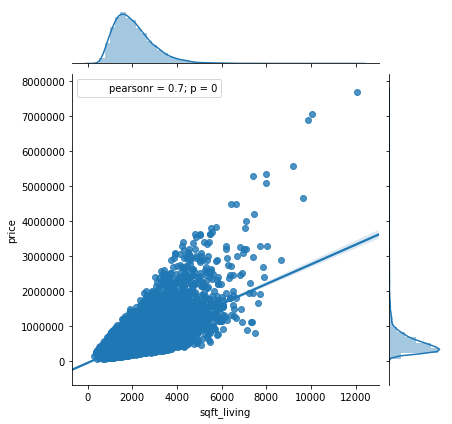

In [13]:
data = data.drop(data[(data['sqft_living']>12000) 
                         & (data['price']<3000000)].index).reset_index(drop=True)

sns.jointplot(x=data['sqft_living'], y=data['price'], kind='reg')
#g.ax_joint.legend_.remove()

df1 = data[['price','sqft_living']]
print (df1.corr(method='pearson'))


          price     grade
price  1.000000  0.667181
grade  0.667181  1.000000


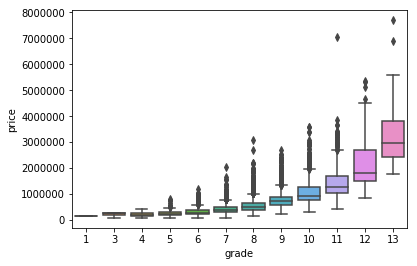

In [14]:
df1 = data[['price','grade']]
print (df1.corr(method='pearson'))

ax = sns.boxplot(x="grade", y="price", data=df1)

          price     grade
price  1.000000  0.737185
grade  0.737185  1.000000


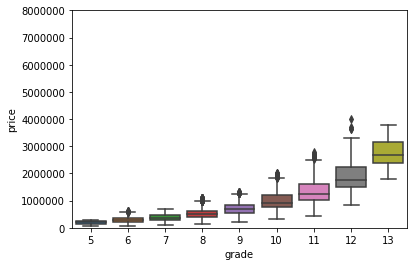

In [15]:
# Grade vs Sale Price after removal of some outliers

data = data.drop(data[(data['grade']<5)].index).reset_index(drop=True)

data = data.drop(data[(data['grade']==13) 
                         & (data['price']>5550000)].index).reset_index(drop=True)
data = data.drop(data[(data['grade']==12) 
                         & (data['price']>4000000)].index).reset_index(drop=True)
data = data.drop(data[(data['grade']==11) 
                         & (data['price']>2800000)].index).reset_index(drop=True)
data = data.drop(data[(data['grade']==10) 
                         & (data['price']>2000000)].index).reset_index(drop=True)
data = data.drop(data[(data['grade']==9) 
                         & (data['price']>1300000)].index).reset_index(drop=True)
data = data.drop(data[(data['grade']==8) 
                         & (data['price']>1100000)].index).reset_index(drop=True)
data = data.drop(data[(data['grade']==7) 
                         & (data['price']>700000)].index).reset_index(drop=True)
data = data.drop(data[(data['grade']==6) 
                         & (data['price']>600000)].index).reset_index(drop=True)
data = data.drop(data[(data['grade']==5) 
                         & (data['price']>300000)].index).reset_index(drop=True)

df1 = data[['price','grade']]

ax = sns.boxplot(x="grade", y="price", data=df1)

plt.ylim(0, 8000000)
print (df1.corr(method='pearson'))

              price  sqft_above
price       1.00000     0.62421
sqft_above  0.62421     1.00000


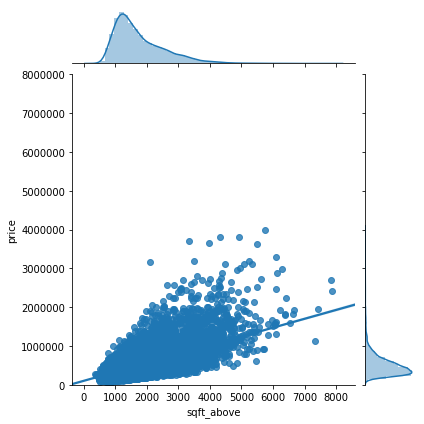

In [16]:
# Sqft above vs Sale Price

g = sns.jointplot(x=data['sqft_above'], y=data['price'], ylim=(0, 8000000), kind='reg')
g.ax_joint.legend_.remove()

df = data[['price','sqft_above']]

print (df.corr(method='pearson'))

               price  sqft_above
price       1.000000    0.627238
sqft_above  0.627238    1.000000


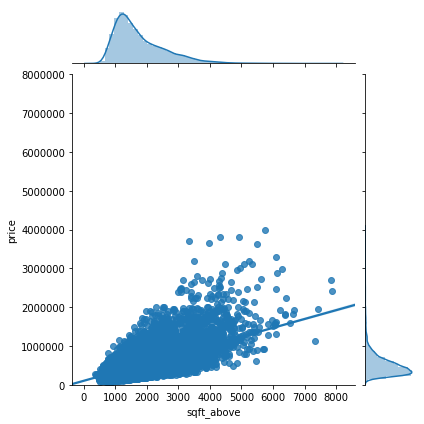

In [17]:
# Sqft above vs Sale Price after removal of some outliers
data = data.drop(data[(data['sqft_above']<3000) 
                         & (data['price']>2000000)].index).reset_index(drop=True)

g = sns.jointplot(x=data['sqft_above'], y=data['price'],ylim=(0, 8000000), kind='reg')
g.ax_joint.legend_.remove()

df1 = data[['price','sqft_above']]
print (df1.corr(method='pearson'))

                  price  sqft_living15
price          1.000000       0.603824
sqft_living15  0.603824       1.000000


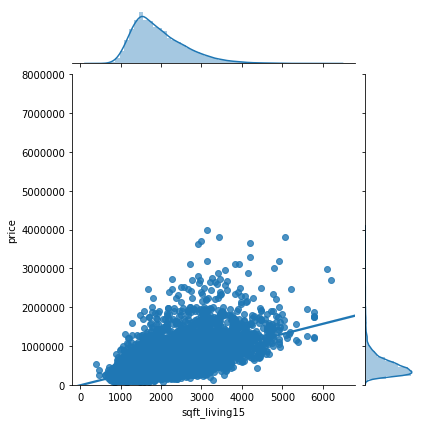

In [18]:
# Living Area 15 vs Sale Price

g = sns.jointplot(x=data['sqft_living15'], y=data['price'],ylim=(0, 8000000), kind='reg')
g.ax_joint.legend_.remove()

df1 = data[['price','sqft_living15']]


print (df1.corr(method='pearson'))

                  price  sqft_living15
price          1.000000       0.609781
sqft_living15  0.609781       1.000000


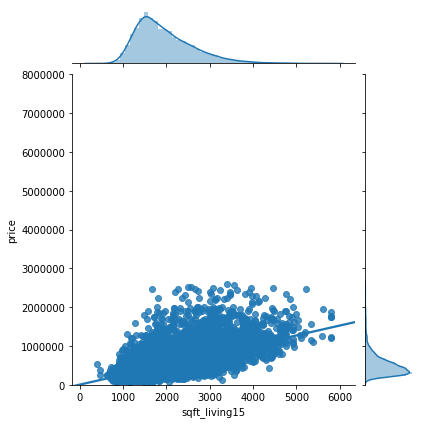

In [19]:
# Living Area 15 vs Sale Price after removal of some outliers
data = data.drop(data[(data['price']>2600000)].index).reset_index(drop=True)

g = sns.jointplot(x=data['sqft_living15'], y=data['price'],ylim=(0, 8000000), kind='reg')
g.ax_joint.legend_.remove()

df1 = data[['price','sqft_living15']]

print (df1.corr(method='pearson'))

**Change in Pearson r coefficient after removal of outliers**

square footage living: 0.7020 --> 0.7022 <br>
grade: 0.6672 --> 0.7372 <br>
square footage above: 0.6242 --> 0.6272 <br>
square footage living 15: 0.6038 --> 0.6098

### Test Variable (price) Analysis following feature engineering and cleaning of the data


In [20]:
data['price'].describe()

count    2.063900e+04
mean     5.050514e+05
std      2.787853e+05
min      7.800000e+04
25%      3.170000e+05
50%      4.400000e+05
75%      6.120000e+05
max      2.600000e+06
Name: price, dtype: float64

Skewness: 2.121132
Kurtosis: 7.410799


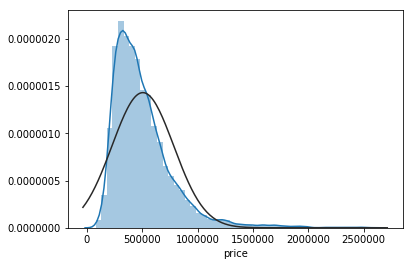

In [21]:
# Plot Histogram of price
sns.distplot(data['price'] , fit=norm);

print("Skewness: %f" % data['price'].skew())
print("Kurtosis: %f" % data['price'].kurt())

Looking now at the **kurtosis score**, it has decreased from 37.16 to 7.50, which makes it closer to the expected value of 3. Even though the skewness remains high, it has decreased from  4.13 to 2.24.

### Machine Learning Techniques

Three different **Machine Learning models ** are applied to the processed data using a random seed of 42. <br>
A prediction score; the accuracy of each prediction, is calculated for each model. <br>
    **-  Linear Regression** <br>
    **-  Gradient Boosting Regression**<br>
    **-  Random Forest Regression**

In [ ]:
#Splitting the data to train & test sets
labels = data['price']
train1 = data.drop(['id', 'price'],axis=1)
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state = 42)

0.7561083772114092


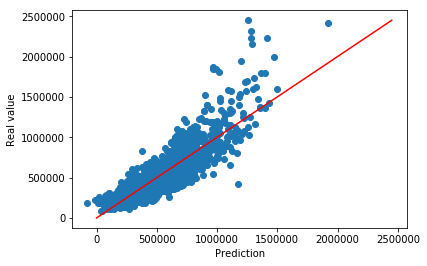

In [22]:
reg = LinearRegression()

reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

print (reg.score(x_test,y_test))

# Build a plot
plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

0.8868504830097654


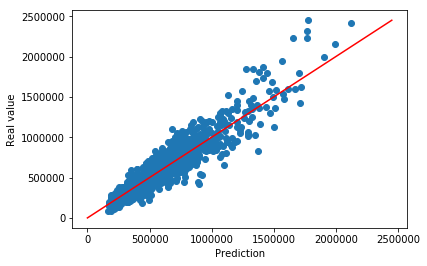

In [23]:
reg = GradientBoostingRegressor()

reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

print (reg.score(x_test,y_test))

# Build a plot
plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

0.8922907963282171


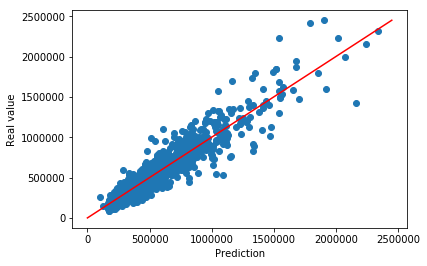

In [24]:
reg = RandomForestRegressor()

reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

print (reg.score(x_test,y_test))

# Build a plot
plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')

plt.show()

### Results & Conclusion

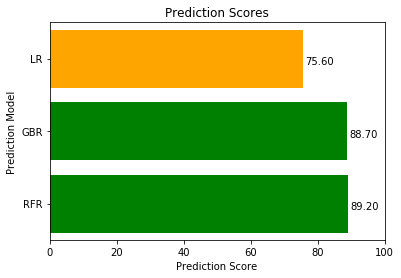

In [26]:
model = ['LR', 'GBR', 'RFR']
score = [75.6, 88.7, 89.2]
df = pd.DataFrame(score, model)
df.reset_index(level=0, inplace=True)
df.columns = ['model', 'score']

#make the bar plot
ax = sns.barplot(x = 'score', y = 'model', data = df)
plt.xlim(0, 100)
plt.title('Prediction Scores')
plt.xlabel('Prediction Score')
plt.ylabel('Prediction Model')

for p in ax.patches:
    width = p.get_width()
    if width >= 85 :
        plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
                 '{:1.2f}'.format(width),
                 ha='center', va='center')
        p.set_facecolor('green')
    else:
        plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
                '{:1.2f}'.format(width),
                 ha='center', va='center')
        p.set_facecolor('orange')

Based on the above barchart, which depicts the corresponding prediction model used and the generated prediction score, it can be concluded that ** compared to the threshold of 85% accuracy, the Gradeint Boosting (GBR) and Random Forest Regression (RFR) have outperformed the Linear Regression (LR) model by at least 13.1% **. <br>
Both **GBR and RFR have a higher accuracy** than 85%, of 88.70% and 89.70% respectively. 